# Orbital Mechanics HW 3

### Name: Aziz Alwatban
### Date: 11/10/2021

In [23]:
from numpy import *
import matplotlib.pyplot as plt

## Problem 1:

**Answer the following regarding sidereal and solar time <br> <br>**
**(a) Which is longer - a sidereal or solar day? Why? <br>**
**(b) What causes and apparent solar day to be different than a mean solar day? <br>**
**(c) What was the local sidereal time (in degrees) of Greenwhich, England at 04:30 hours (local) on October 2, 2012 if**
**$\theta{_{g0}}$ for Jan 1, 2012 0-hr UT is 100.35 deg? <br>**
**(d) What is the sidereal time for Georgia Tech at that same moment? <br>**
**(e) Does it make a difference whether Georgia is on standard or daylight savings time?**

a) A solar day is longer since the earth takes more time to rotate back in the direction of the sun compared to rotating about itself

b) The apparent angular velocity of the sun is not constant as seen by observers in earth, so astronomers invented a mean sun that moves at a uniform rate.

c)

In [34]:
lt = 15 * 4.5 #the earht rotates at 15 degrees per hour
st = lt + 100.35
print("The local sidereal time is {:.2f} degrees".format(st))


The local sidereal time is 167.85 degrees


d)

In [35]:
thetaGeorgia = 33.7756
stGeorgia = st - thetaGeorgia
print("The sideral time for Georgia Tech is {:.2f} degrees".format(stGeorgia))

The sideral time for Georgia Tech is 134.07 degrees


e) No, it doesn't matter

## Problem 2:

**Consider sun-synchronous orbits. Construct a 3D plot in a-e-i space for the following ranges: <br>**
**a∈[Re,Re +3,000] km <br>**
**e ∈ [0, 0.3] <br>**
**i ∈ [90, 180] deg <br>**

**In your figure, please include the following elements <br>**
**• The 2D surface implicitly defined by the sun-synchronous orbit constraint. <br>**
**• All space catalog objects in these orbit ranges. Use the space object catalog posted on**
**Canvas (catalog TLEs.mat). <br> <br>**
**Please comment on any orbit periods, groupings, or apparent patterns in the space object <br>**
**catalog in relation to the sun-synchronous orbit constraint.**


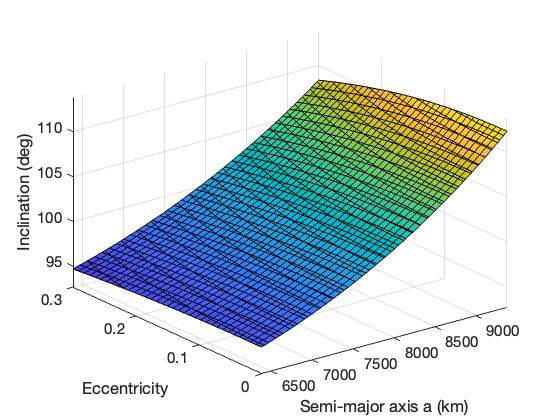 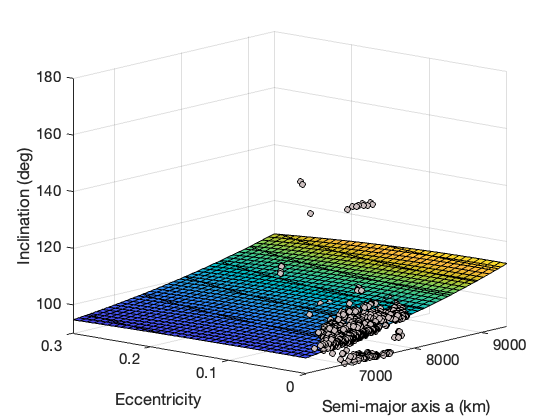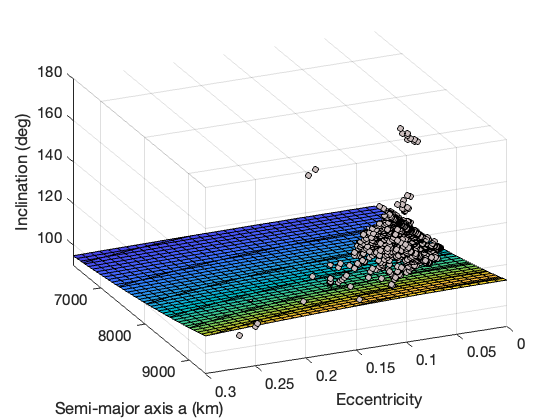

The first thing that we notice is that most sattelites are close to a circular orbit when in sun-synchronous. Also, sattelites tend to cluster toward the lower end of the semi-major axis, meaning smaller orbits. Finally, almost all orbits are close to an inclination of 100 degrees. What this tells us is that sun-synchronous orbits tend to have circular shape, small orbits and thus faster period, and an inclination near polar.

## Problem 3:

**Three spacecraft in circular sun-synchronous orbits have the following restrictions imposed on their orbits: <br> <br>**
**(a) It is desired that each spacecraft pass above the same points on Earth two, three, and four times a day, respectively.**
**Find the required semi-major axis. <br>**
**(b) For each of these three orbits, calculate the inclinations using the aforementioned semi- major axes. <br>**
**(c) For a sun-synchronous orbit with an eccentricity of 0.4, calculate the semi-major axis such that the argument of** **periapsisis not perturbed by J2 effects. <br>**
**(d) Generate 3D plots of each of these three orbits in the ECI coordinate frame.**

In [25]:
## Part a:

import sympy as sm

mu = 3.986 * 10**5 #km^3/s^-2
EarthPeriod = 24 * 60 * 60
a = sm.Symbol('a')
a2 = sm.solvers.solve(EarthPeriod/2 - 2*pi*sm.sqrt(a**3/mu), a)
a3 = sm.solvers.solve(EarthPeriod/3 - 2*pi*sm.sqrt(a**3/mu), a)
a4 = sm.solvers.solve(EarthPeriod/4 - 2*pi*sm.sqrt(a**3/mu), a)

print("The semi-major axes to pass the same points on earth 2 times is a = {:.2f} km and to pass 3 times a = {:.2f} km \
while to pass 4 times a = {:.2f} km".format(a2[0], a3[0], a4[0]))

The semi-major axes to pass the same points on earth 2 times is a = 26610.21 km and to pass 3 times a = 20307.39 km while to pass 4 times a = 6652.55 km


In [36]:
## Part b:
omegaDot = 0.9856/180*pi/24/60/60
Re = 6378
J2 = 1.087*10**(-3)
i = sm.Symbol('i')
i2 = sm.solvers.solve(omegaDot + 3/2 * J2 * sqrt(mu)*Re**2 * sm.cos(i)/(a2[0]**(7/2)),i )
i3 = sm.solvers.solve(omegaDot + 3/2 * J2 * sqrt(mu)*Re**2 * sm.cos(i)/(a3[0]**(7/2)),i )
i4 = sm.solvers.solve(omegaDot + 3/2 * J2 * sqrt(mu)*Re**2 * sm.cos(i)/(a4[0]**(7/2)),i )

print("I believe there is a mistake in this quesiton because this orbit is not possible while defined as sun-synchronous.\
It doesn't even exist in the plan in problem 2")
i2, i3, i4

I believe there is a mistake in this quesiton because this orbit is not possible while defined as sun-synchronous.It doesn't even exist in the plan in problem 2


([3.14159265358979 - 3.37396827448796*I,
  3.14159265358979 + 3.37396827448796*I],
 [3.14159265358979 - 2.42119845701613*I,
  3.14159265358979 + 2.42119845701613*I],
 [1.68521928871133, 4.59796601846826])

## Part c:
The rotation the line of apsides is defined as:
$$ \dot{w} = \frac{3}{2} n J_2 (\frac{R_e}{P})^2 (2-\frac{5}{2}sin^2(i) $$
To have an argument of periapsis not perturbed by J2 effects, this equation should equal to zero. This happens when 
$$ sin^2(i) = 4/5 $$
$$ i = 63.5 ^o$$
Now we can use the regression of the line of nodes to fine the required semi major axis that satisfies this condition

In [22]:
i = 63.5/180*pi
e = 0.4
a = sm.Symbol('a')
a1 = sm.solvers.solve(omegaDot + 3/2 * J2 * sqrt(mu)*Re**2 * cos(i)/(a*(1-e**2)**2),a )
a1 = a1[0]**(2)
semiAxis = a1**(1/7)
print("The semi major axis required for this orbit is {:.2f} km".format(semiAxis))

The semi major axis required for this orbit is 10848.99 km


# Matlab code:

In [37]:
clc; clear all; close all


omegaDot = 0.9856/180*pi/24/60/60;
Re = 6378;
J2 = 1.087e-3;
mu = 398600;
func = @(a,e,i) omegaDot + 3/2 * J2 * sqrt(mu) * Re^2 .* cosd(i) ./ (a.^(7/2) *(1-e.^2).^2);

hf = figure()
fimplicit3(func, [Re, Re+3000, 0, 0.3, 90, 180])
xlabel("Semi-major axis a (km)")
ylabel("Eccentricity")
zlabel("Inclination (deg)")
set(gca, 'FontSize', 15)
grid on; 

f = load('catalog_TLEs.mat');
h = f.catalog_TLEs;

for i = 1:length(h)

    temp = h(i);
    d = temp{1,1};
    a(i) = d.semimajoraxis;
    e(i) = d.eccentricity;
    inc(i) = d.inclination;
end

hold on
scatter3(a, e, inc, 'filled',...
    'MarkerEdgeColor','k',...
        'MarkerFaceColor',[0.8 .75 .75])
xlim([Re, Re+3000])
ylim([0, 0.3])
zlim([90, 180])

a1 = linspace(6378, 6378+3000, 200);
e1 = linspace(0, 0.3, 200);
i1 = linspace(90, 180, 200);


SyntaxError: invalid syntax (<ipython-input-37-889b17fef795>, line 1)